<a href="https://colab.research.google.com/github/albertoalvarezz/albertoalvarezz-DataScience-GenAI-Submissions/blob/main/FINANCIALMAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

os.listdir('/content/drive/MyDrive/Currencies Data')

['United Kingdom 2-Year Bond Yield Historical Data.csv',
 'United States 2-Year Bond Yield Historical Data.csv',
 'EUR_USD Historical Data.csv',
 'GBP_USD Historical Data.csv']

In [ ]:
import pandas as pd

# Updated file names to match the user's selected files
united_states_file = '/content/drive/MyDrive/Currencies Data/United States 2-Year Bond Yield Historical Data.csv'
united_kingdom_file = "/content/drive/MyDrive/Currencies Data/United Kingdom 2-Year Bond Yield Historical Data.csv"

# --- United States data ---
try:
    df_us = pd.read_csv(united_states_file)
    print(f"--- Data from '{united_states_file}' ---")
    print("Head:")
    print(df_us.head())
    print("\nShape:")
    print(df_us.shape)
except FileNotFoundError:
    print(f"Error: '{united_states_file}' not found. Please ensure the file is uploaded and the name is correct.")
except Exception as e:
    print(f"An error occurred while processing '{united_states_file}': {e}")

print("\n") # Separator for clarity

# --- United Kingdom data ---
try:
    df_uk = pd.read_csv(united_kingdom_file)
    print(f"--- Data from '{united_kingdom_file}' ---")
    print("Head:")
    print(df_uk.head())
    print("\nShape:")
    print(df_uk.shape)
except FileNotFoundError:
    print(f"Error: '{united_kingdom_file}' not found. Please ensure the file is uploaded and the name is correct.")
except Exception as e:
    print(f"An error occurred while processing '{united_kingdom_file}': {e}")


--- Data from '/content/drive/MyDrive/Currencies Data/United States 2-Year Bond Yield Historical Data.csv' ---
Head:
         Date,"Price","Open","High","Low","Change %"
0  03/19/2018,"2.312","2.307","2.320","2.287","0....
1  03/16/2018,"2.295","2.291","2.295","2.279","0....
2  03/15/2018,"2.287","2.270","2.291","2.250","1....
3  03/14/2018,"2.262","2.262","2.291","2.246","0....
4  03/13/2018,"2.258","2.270","2.274","2.242","-0...

Shape:
(5000, 1)


--- Data from '/content/drive/MyDrive/Currencies Data/United Kingdom 2-Year Bond Yield Historical Data.csv' ---
Head:
         Date,"Price","Open","High","Low","Change %"
0  04/04/2018,"0.8460","0.8380","0.8530","0.8130"...
1  04/03/2018,"0.8380","0.8110","0.8490","0.8110"...
2  03/30/2018,"0.8210","0.8250","0.8250","0.8210"...
3  03/29/2018,"0.8200","0.8350","0.8420","0.8130"...
4  03/28/2018,"0.8320","0.8740","0.8770","0.8230"...

Shape:
(5000, 1)


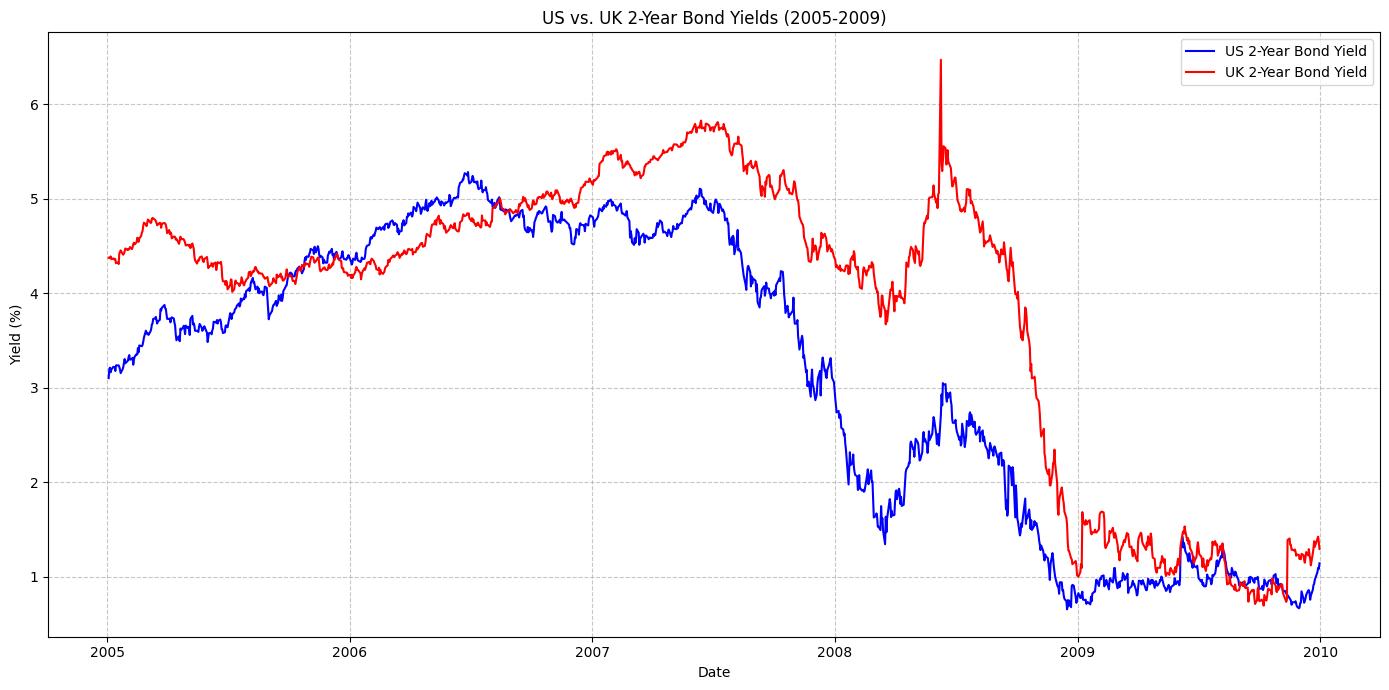

In [ ]:
import matplotlib.pyplot as plt
import io

# Function to clean and preprocess DataFrame
def preprocess_bond_data(df):
    # The data was loaded as a single column string, so we need to parse it
    # Create a string buffer to re-read the data correctly
    s = io.StringIO()
    # Write the correct header line based on the original data structure
    s.write("Date,Price,Open,High,Low,Change %\n")
    # Write the data rows, accessing the first (and only) column of the malformed DataFrame
    for index, row_str in df.iloc[:, 0].items():
        s.write(f"{row_str}\n")
    s.seek(0) # Rewind the buffer

    # Read the CSV from the string buffer with proper parsing
    df_cleaned = pd.read_csv(s, sep=',', quotechar='"', parse_dates=['Date'])

    # Convert 'Price' to numeric, coercing errors to NaN
    df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'], errors='coerce')
    df_cleaned.dropna(subset=['Price'], inplace=True)

    # Set 'Date' as index for easier filtering and plotting
    df_cleaned.set_index('Date', inplace=True)
    df_cleaned.sort_index(inplace=True)

    return df_cleaned[['Price']]

# Preprocess both US and UK data
df_us_processed = preprocess_bond_data(df_us)
df_uk_processed = preprocess_bond_data(df_uk)

# Filter for the year range 2005-2009
df_us_2005_2009 = df_us_processed.loc['2005-01-01':'2009-12-31']
df_uk_2005_2009 = df_uk_processed.loc['2005-01-01':'2009-12-31']

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df_us_2005_2009.index, df_us_2005_2009['Price'], label='US 2-Year Bond Yield', color='blue')
plt.plot(df_uk_2005_2009.index, df_uk_2005_2009['Price'], label='UK 2-Year Bond Yield', color='red')

plt.title('US vs. UK 2-Year Bond Yields (2005-2009)')
plt.xlabel('Date')
plt.ylabel('Yield (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

gbp_usd_file = "/content/drive/MyDrive/Currencies Data/GBP_USD Historical Data.csv"

try:
    df_gbp_usd = pd.read_csv(gbp_usd_file)
    print(f"--- Data from '{gbp_usd_file}' ---")
    print("Head:")
    print(df_gbp_usd.head())
    print("\nShape:")
    print(df_gbp_usd.shape)

    # Convert 'Date' column to datetime and set as index
    df_gbp_usd['Date'] = pd.to_datetime(df_gbp_usd['Date'])
    df_gbp_usd.set_index('Date', inplace=True)

    # Rename the price column for consistency
    df_gbp_usd.rename(columns={'Price': 'price_gbp_usd'}, inplace=True)

    print("\n--- Prepared df_gbp_usd ---")
    print(df_gbp_usd.head())
    print(df_gbp_usd.index)

except Exception as e:
    print(f"An error occurred while processing '{gbp_usd_file}': {e}")


--- Data from '/content/drive/MyDrive/Currencies Data/GBP_USD Historical Data.csv' ---
Head:
         Date   Price    Open    High     Low  Vol. Change %
0  03/05/2019  1.3175  1.3177  1.3200  1.3098   NaN   -0.08%
1  03/04/2019  1.3186  1.3238  1.3274  1.3165   NaN   -0.12%
2  03/01/2019  1.3202  1.3262  1.3287  1.3171   NaN   -0.44%
3  02/28/2019  1.3261  1.3309  1.3326  1.3253   NaN   -0.35%
4  02/27/2019  1.3308  1.3250  1.3350  1.3232   NaN    0.44%

Shape:
(5000, 7)

--- Prepared df_gbp_usd ---
            price_gbp_usd    Open    High     Low  Vol. Change %
Date                                                            
2019-03-05         1.3175  1.3177  1.3200  1.3098   NaN   -0.08%
2019-03-04         1.3186  1.3238  1.3274  1.3165   NaN   -0.12%
2019-03-01         1.3202  1.3262  1.3287  1.3171   NaN   -0.44%
2019-02-28         1.3261  1.3309  1.3326  1.3253   NaN   -0.35%
2019-02-27         1.3308  1.3250  1.3350  1.3232   NaN    0.44%
DatetimeIndex(['2019-03-05', '2019-03-0

In [ ]:
# Step 1: Ensure all DataFrames are sorted by Date ascending
df_us_renamed = df_us_processed.rename(columns={'Price': 'price_us'}).sort_index()
df_uk_renamed = df_uk_processed.rename(columns={'Price': 'price_uk'}).sort_index()
df_gbp_usd_renamed = df_gbp_usd.rename(columns={'Price': 'price_gbp_usd'}).sort_index()

# Step 2: Keep only the price columns
df_us_renamed = df_us_renamed[['price_us']]
df_uk_renamed = df_uk_renamed[['price_uk']]
df_gbp_usd_renamed = df_gbp_usd_renamed[['price_gbp_usd']]

# Step 3: Merge using outer join on index
merged_df = df_us_renamed.join([df_uk_renamed, df_gbp_usd_renamed], how='outer')

print("--- Merged DataFrame ---")
print(merged_df.head())
print(merged_df.tail())
print("\nShape:", merged_df.shape)


--- Merged DataFrame ---
            price_us  price_uk  price_gbp_usd
Date                                         
2000-01-03     6.396       NaN         1.6368
2000-01-04     6.294     6.360         1.6365
2000-01-05     6.362     6.557         1.6415
2000-01-06     6.311     6.568         1.6463
2000-01-07     6.295     6.566         1.6383
            price_us  price_uk  price_gbp_usd
Date                                         
2019-02-27       NaN       NaN         1.3308
2019-02-28       NaN       NaN         1.3261
2019-03-01       NaN       NaN         1.3202
2019-03-04       NaN       NaN         1.3186
2019-03-05       NaN       NaN         1.3175

Shape: (5627, 3)


In [ ]:
print(df_gbp_usd_renamed.index)


DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2019-02-20', '2019-02-21', '2019-02-22', '2019-02-25',
               '2019-02-26', '2019-02-27', '2019-02-28', '2019-03-01',
               '2019-03-04', '2019-03-05'],
              dtype='datetime64[ns]', name='Date', length=5000, freq=None)


In [ ]:
print(df_us_renamed.index)
print(df_uk_renamed.index)
print(df_gbp_usd_renamed.index)

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2018-03-06', '2018-03-07', '2018-03-08', '2018-03-09',
               '2018-03-12', '2018-03-13', '2018-03-14', '2018-03-15',
               '2018-03-16', '2018-03-19'],
              dtype='datetime64[ns]', name='Date', length=5000, freq=None)
DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2018-03-21', '2018-03-22', '2018-03-23', '2018-03-26',
               '2018-03-27', '2018-03-28', '2018-03-29', '2018-03-30',
               '2018-04-03', '2018-04-04'],
              dtype='datetime64[ns]', name='Date', length=5000, freq=None)
DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',

In [ ]:
print("Missing values per column in merged_df:")
print(merged_df.isnull().sum())

Missing values per column in merged_df:
price_us         627
price_uk         627
price_gbp_usd    627
dtype: int64


In [ ]:
merged_df_cleaned = merged_df.dropna()

print("--- Merged DataFrame after dropping rows with missing values ---")
print("Head:")
print(merged_df_cleaned.tail())
print("\nShape:")
print(merged_df_cleaned.shape)

--- Merged DataFrame after dropping rows with missing values ---
Head:
            price_us  price_uk  price_gbp_usd
Date                                         
2018-03-13     2.258     0.840         1.3959
2018-03-14     2.262     0.801         1.3959
2018-03-15     2.287     0.810         1.3936
2018-03-16     2.295     0.809         1.3939
2018-03-19     2.312     0.826         1.4023

Shape:
(4598, 3)


There is no reliable data available for the historical forward rates. Therefore, the best option is going to be to calculate them using the YTM of the 2-year bonds. The calculation is more accurate if the zero coupon rates are used instead but as the maturity is such a short period then the approximation is good enough. Besides that the CIP formula is a coefficient, the error will be reduced as 2-year bonds will be used both in the numerator and denominator.

To do the backtesting and see how the forward rates (in 2 years) correlate with the spot rates at the date of the forward a new column will be added to our data frame with the forward rate calculated as explained above.

In [ ]:
merged_df_cleaned['us_to_uk_price_ratio'] =(1 + (merged_df_cleaned['price_us'] / 100))**2 /(1 + (merged_df_cleaned['price_uk'] / 100))**2

print("--- Merged DataFrame with new 'us_to_uk_price_ratio' column ---")
print("Head:")
print(merged_df_cleaned.head())
print("\nShape:")
print(merged_df_cleaned.shape)

--- Merged DataFrame with new 'us_to_uk_price_ratio' column ---
Head:
            price_us  price_uk  price_gbp_usd  us_to_uk_price_ratio
Date                                                               
2000-01-04     6.294     6.360         1.6365              0.998759
2000-01-05     6.362     6.557         1.6415              0.996343
2000-01-06     6.311     6.568         1.6463              0.995183
2000-01-07     6.295     6.566         1.6383              0.994920
2000-01-10     6.363     6.519         1.6365              0.997073

Shape:
(4598, 4)


/tmp/ipython-input-507928034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_cleaned['us_to_uk_price_ratio'] =(1 + (merged_df_cleaned['price_us'] / 100))**2 /(1 + (merged_df_cleaned['price_uk'] / 100))**2


The following code will calculate the forward rates by using the us to uk ratio and the spot rate

In [ ]:
merged_df_cleaned['2_year_forward_rate'] = merged_df_cleaned['us_to_uk_price_ratio'] * merged_df_cleaned['price_gbp_usd']

print("--- Merged DataFrame with new '2_year_forward_rate' column ---")
print("Head:")
print(merged_df_cleaned.head())
print("\nShape:")
print(merged_df_cleaned.shape)

--- Merged DataFrame with new '2_year_forward_rate' column ---
Head:
            price_us  price_uk  price_gbp_usd  us_to_uk_price_ratio  \
Date                                                                  
2000-01-04     6.294     6.360         1.6365              0.998759   
2000-01-05     6.362     6.557         1.6415              0.996343   
2000-01-06     6.311     6.568         1.6463              0.995183   
2000-01-07     6.295     6.566         1.6383              0.994920   
2000-01-10     6.363     6.519         1.6365              0.997073   

            2_year_forward_rate  
Date                             
2000-01-04             1.634470  
2000-01-05             1.635498  
2000-01-06             1.638369  
2000-01-07             1.629978  
2000-01-10             1.631710  

Shape:
(4598, 5)


/tmp/ipython-input-918976182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_cleaned['2_year_forward_rate'] = merged_df_cleaned['us_to_uk_price_ratio'] * merged_df_cleaned['price_gbp_usd']


In the previous data frame we can see an approximation of the 2 year forward rates. We will now create a new column that shows what the forward rate calculated 2 years ago for that date was going to be.

The new column, Forward_rate_at_expiry takes the value of the forwards rates 2 years ago. For example the data for Forward_rate_at_expiry for the 2008-01-06 is the same as the value in the column 2_year_forward_rate in 2006-01-06 (If it is a weekend we take the value of the closing price in the previous friday.)

In [ ]:
# The user wants F_expiry(D) = F_current(D - 2 years).
# This means we take the '2_year_forward_rate' value from D-2Y and assign it to D.

# Create a temporary Series from '2_year_forward_rate' for shifting
temp_series_for_shift = merged_df_cleaned['2_year_forward_rate'].copy()

# Shift the index of this temporary Series forward by two years.
# The value originally at index 'D_old' will now be associated with index 'D_old + 2 years'.
shifted_index = temp_series_for_shift.index + pd.DateOffset(years=2)
shifted_values_series = pd.Series(temp_series_for_shift.values, index=shifted_index)

# Handle potential duplicate indices that might arise after shifting (less common with +2Y, but good practice)
if not shifted_values_series.index.is_unique:
    shifted_values_series = shifted_values_series.loc[~shifted_values_series.index.duplicated(keep='last')]

# Reindex this shifted Series to align with the original merged_df_cleaned index.
# This will correctly align 'rate(D-2Y)' with 'D' and fill with NaN where no matching shifted date exists.
# Then, apply ffill(limit=2) to handle small gaps.
merged_df_cleaned.loc[:, 'Forward_rate_at_expiry'] = shifted_values_series.reindex(merged_df_cleaned.index).ffill(limit=2)

print("--- Merged DataFrame with corrected 'Forward_rate_at_expiry' column (shifted forward) ---")
print("Head:")
print(merged_df_cleaned.head())
print("\nTail:")
print(merged_df_cleaned.tail())
print("\nShape:")
print(merged_df_cleaned.shape)
print("\nMissing values in 'Forward_rate_at_expiry' after correction and ffill:")
print(merged_df_cleaned['Forward_rate_at_expiry'].isnull().sum())

--- Merged DataFrame with corrected 'Forward_rate_at_expiry' column (shifted forward) ---
Head:
            price_us  price_uk  price_gbp_usd  us_to_uk_price_ratio  \
Date                                                                  
2000-01-04     6.294     6.360         1.6365              0.998759   
2000-01-05     6.362     6.557         1.6415              0.996343   
2000-01-06     6.311     6.568         1.6463              0.995183   
2000-01-07     6.295     6.566         1.6383              0.994920   
2000-01-10     6.363     6.519         1.6365              0.997073   

            2_year_forward_rate  Forward_rate_at_expiry  
Date                                                     
2000-01-04             1.634470                     NaN  
2000-01-05             1.635498                     NaN  
2000-01-06             1.638369                     NaN  
2000-01-07             1.629978                     NaN  
2000-01-10             1.631710                     NaN  


/tmp/ipython-input-3395408303.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_cleaned.loc[:, 'Forward_rate_at_expiry'] = shifted_values_series.reindex(merged_df_cleaned.index).ffill(limit=2)


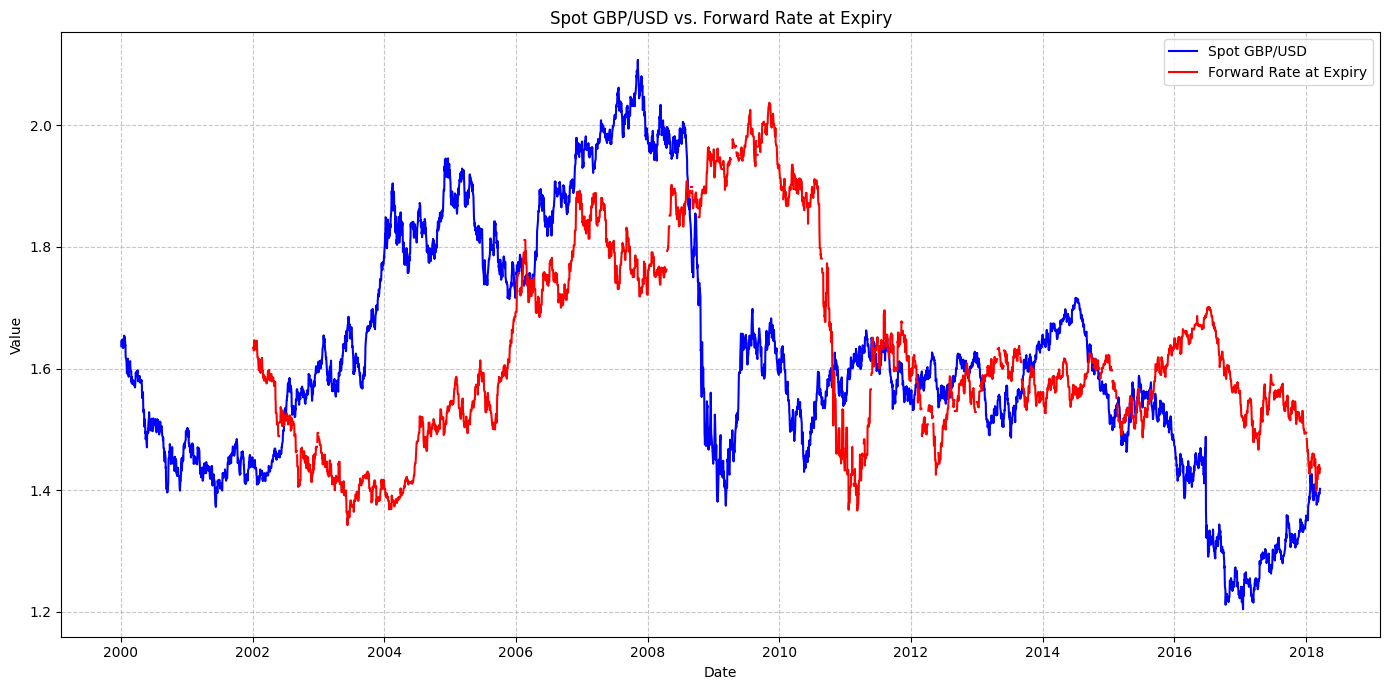

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Plot us_to_uk_price_ratio
plt.plot(merged_df_cleaned.index, merged_df_cleaned['price_gbp_usd'], label='Spot GBP/USD', color='blue')

# Plot Forward_rate_at_expiry
plt.plot(merged_df_cleaned.index, merged_df_cleaned['Forward_rate_at_expiry'], label='Forward Rate at Expiry', color='red')

plt.title('Spot GBP/USD vs. Forward Rate at Expiry')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
correlation = merged_df_cleaned['price_gbp_usd'].corr(merged_df_cleaned['Forward_rate_at_expiry'])
print(f"Pearson Correlation between 'Spot GBP/USD' and 'Forward Rate at Expiry': {correlation:.4f}")

Pearson Correlation between 'Spot GBP/USD' and 'Forward Rate at Expiry': 0.2162


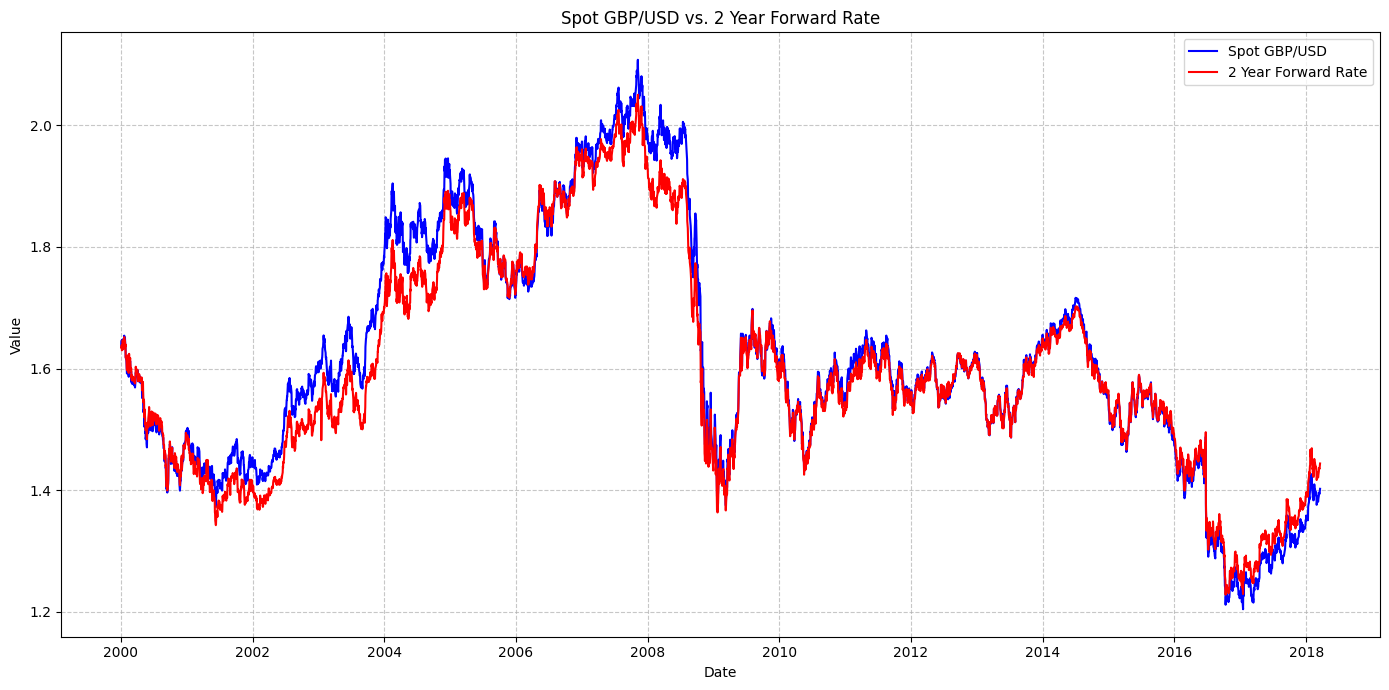

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Plot price_gbp_usd
plt.plot(merged_df_cleaned.index, merged_df_cleaned['price_gbp_usd'], label='Spot GBP/USD', color='blue')

# Plot 2_year_forward_rate
plt.plot(merged_df_cleaned.index, merged_df_cleaned['2_year_forward_rate'], label='2 Year Forward Rate', color='red')

plt.title('Spot GBP/USD vs. 2 Year Forward Rate')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
correlation = merged_df_cleaned['price_gbp_usd'].corr(merged_df_cleaned['2_year_forward_rate'])
print(f"Pearson Correlation between 'Spot GBP/USD' and '2 Year Forward Rate': {correlation:.4f}")

Pearson Correlation between 'Spot GBP/USD' and '2 Year Forward Rate': 0.9883


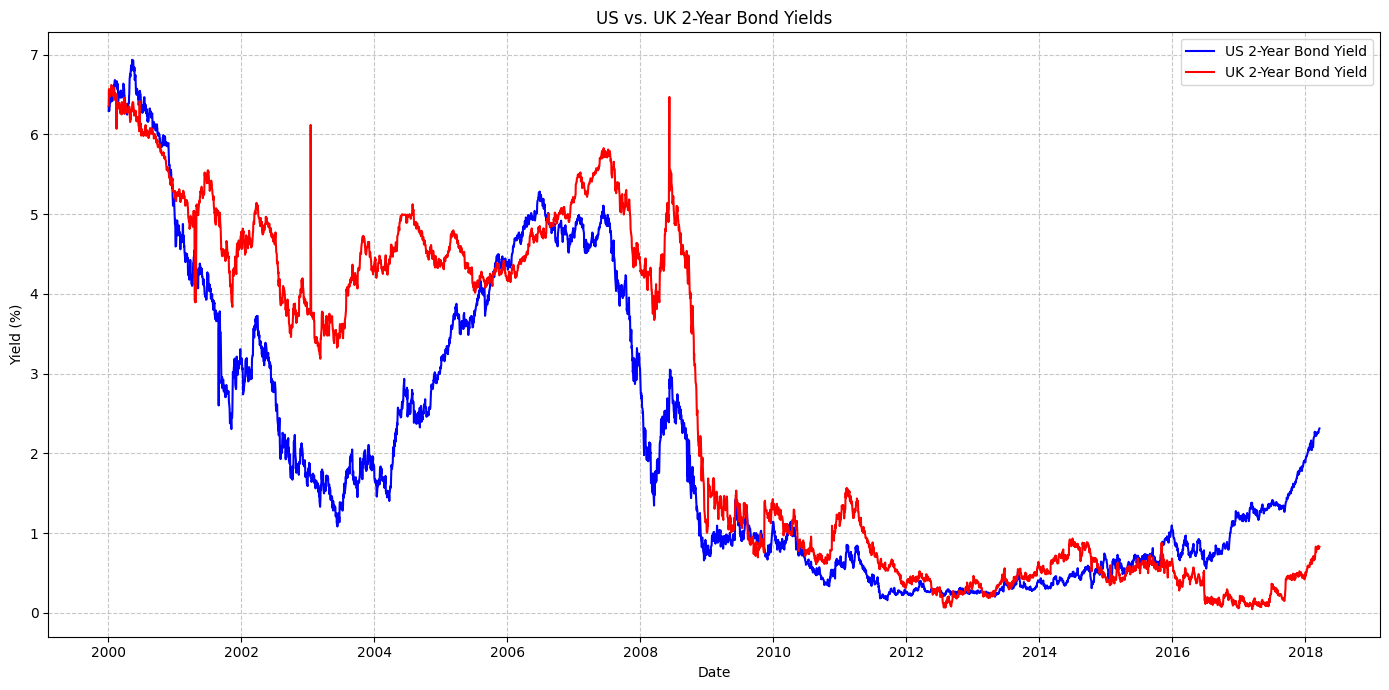

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Plot price_us
plt.plot(merged_df_cleaned.index, merged_df_cleaned['price_us'], label='US 2-Year Bond Yield', color='blue')

# Plot price_uk
plt.plot(merged_df_cleaned.index, merged_df_cleaned['price_uk'], label='UK 2-Year Bond Yield', color='red')

plt.title('US vs. UK 2-Year Bond Yields')
plt.xlabel('Date')
plt.ylabel('Yield (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

Looking at both graphs we can see how the the forward rate is lower than the spot when yield of the UK is higher than the yield for the US.

In [ ]:
# Create a temporary Series from 'price_gbp_usd' for shifting
temp_gbp_usd = merged_df_cleaned['price_gbp_usd'].copy()

# Shift the index of this temporary Series forward by two years.
# The value originally at index 'D_old' will now be associated with index 'D_old + 2 years'.
# This means that when we reindex this series, `value(D_old)` will appear at `D_old + 2 years`.
# So, to get `value(D - 2 years)` at current date `D`, we need to find `value(D_old)` where `D_old + 2 years = D`.
# This is equivalent to shifting the index of the source series forward.
shifted_index = temp_gbp_usd.index + pd.DateOffset(years=2)
shifted_values_series = pd.Series(temp_gbp_usd.values, index=shifted_index)

# Handle potential duplicate indices that might arise after shifting (less common with +2Y, but good practice)
if not shifted_values_series.index.is_unique:
    shifted_values_series = shifted_values_series.loc[~shifted_values_series.index.duplicated(keep='last')]

# Reindex this shifted Series to align with the original merged_df_cleaned index.
# This will correctly align 'price_gbp_usd(D-2Y)' with 'D' and fill with NaN where no matching shifted date exists.
# Then, apply ffill(limit=2) to handle small gaps.
merged_df_cleaned.loc[:, 'price_gbp_usd_2_years_ago'] = shifted_values_series.reindex(merged_df_cleaned.index).ffill(limit=2)

print("--- Merged DataFrame with new 'price_gbp_usd_2_years_ago' column ---")
print("Head:")
print(merged_df_cleaned.head())
print("\nTail:")
print(merged_df_cleaned.tail())
print("\nShape:")
print(merged_df_cleaned.shape)
print("\nMissing values in 'price_gbp_usd_2_years_ago':")
print(merged_df_cleaned['price_gbp_usd_2_years_ago'].isnull().sum())

--- Merged DataFrame with new 'price_gbp_usd_2_years_ago' column ---
Head:
            price_us  price_uk  price_gbp_usd  us_to_uk_price_ratio  \
Date                                                                  
2000-01-04     6.294     6.360         1.6365              0.998759   
2000-01-05     6.362     6.557         1.6415              0.996343   
2000-01-06     6.311     6.568         1.6463              0.995183   
2000-01-07     6.295     6.566         1.6383              0.994920   
2000-01-10     6.363     6.519         1.6365              0.997073   

            2_year_forward_rate  Forward_rate_at_expiry  \
Date                                                      
2000-01-04             1.634470                     NaN   
2000-01-05             1.635498                     NaN   
2000-01-06             1.638369                     NaN   
2000-01-07             1.629978                     NaN   
2000-01-10             1.631710                     NaN   

            p

/tmp/ipython-input-3437154205.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_cleaned.loc[:, 'price_gbp_usd_2_years_ago'] = shifted_values_series.reindex(merged_df_cleaned.index).ffill(limit=2)


In [ ]:
columns_to_drop = ['pnl_strategy', 'cumulative_pnl', 'price_gbp_usd_in_2_years']

# Filter out columns that don't exist in the DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in merged_df_cleaned.columns]

if existing_columns_to_drop:
    merged_df_cleaned = merged_df_cleaned.drop(columns=existing_columns_to_drop)

print("--- Merged DataFrame er dropping specified columns ---")
print("Head:")
print(merged_df_cleaned.head())
print("\nShape:")
print(merged_df_cleaned.shape)

--- Merged DataFrame er dropping specified columns ---
Head:
            price_us  price_uk  price_gbp_usd  us_to_uk_price_ratio  \
Date                                                                  
2000-01-04     6.294     6.360         1.6365              0.998759   
2000-01-05     6.362     6.557         1.6415              0.996343   
2000-01-06     6.311     6.568         1.6463              0.995183   
2000-01-07     6.295     6.566         1.6383              0.994920   
2000-01-10     6.363     6.519         1.6365              0.997073   

            2_year_forward_rate  Forward_rate_at_expiry  \
Date                                                      
2000-01-04             1.634470                     NaN   
2000-01-05             1.635498                     NaN   
2000-01-06             1.638369                     NaN   
2000-01-07             1.629978                     NaN   
2000-01-10             1.631710                     NaN   

            price_gbp_usd_2

In [ ]:
import pandas as pd

# Ensure your DataFrame index is a DatetimeIndex
merged_df_cleaned = merged_df_cleaned.sort_index()  # ascending dates

# Define a function to get the closest future value
def forward_fill_2_years(df, col_name):
    new_col = []
    for current_date in df.index:
        target_date = current_date + pd.DateOffset(years=2)
        # Try to get the exact date, if not available get the next valid index
        future_dates = df.loc[target_date:].index
        if len(future_dates) > 0:
            new_col.append(df.loc[future_dates[0], col_name])
        else:
            new_col.append(pd.NA)  # if no future date exists
    return pd.Series(new_col, index=df.index)

# Create the new column
merged_df_cleaned['price_gbp_usd_in_2_years'] = forward_fill_2_years(
    merged_df_cleaned, 'price_gbp_usd'
)

# Check the result
print(merged_df_cleaned[['price_gbp_usd', 'price_gbp_usd_in_2_years']].head(10))
print(merged_df_cleaned.head())


            price_gbp_usd price_gbp_usd_in_2_years
Date                                              
2000-01-04         1.6365                   1.4456
2000-01-05         1.6415                   1.4393
2000-01-06         1.6463                   1.4393
2000-01-07         1.6383                   1.4393
2000-01-10         1.6365                   1.4398
2000-01-11         1.6480                   1.4488
2000-01-12         1.6474                   1.4497
2000-01-13         1.6462                   1.4497
2000-01-14         1.6336                   1.4497
2000-01-18         1.6365                   1.4371
            price_us  price_uk  price_gbp_usd  us_to_uk_price_ratio  \
Date                                                                  
2000-01-04     6.294     6.360         1.6365              0.998759   
2000-01-05     6.362     6.557         1.6415              0.996343   
2000-01-06     6.311     6.568         1.6463              0.995183   
2000-01-07     6.295     6.566   

This shows that the current spot GBP/USD has more correlation (0.2666) than the forward GBP/USD rate (0.2162) with the spot GBP/USD 2 years from now.

Now we will compute a trading strategy which will try to benefit from the low correlation between the forwards and the actual exchange rates in the expiry date.

The core idea of the strategy is to exploit this divergence and the little accuracy that the forwards have with the actual price in the future.

In [ ]:
if 'price_gbp_usd_2_years_ago' in merged_df_cleaned.columns:
    merged_df_cleaned = merged_df_cleaned.drop(columns=['price_gbp_usd_2_years_ago'])
    print("Column 'price_gbp_usd_2_years_ago' deleted from merged_df_cleaned.")
else:
    print("Column 'price_gbp_usd_2_years_ago' not found in merged_df_cleaned.")

print("--- Updated merged_df_cleaned Head---")
print(merged_df_cleaned.head())
print("\nUpdated merged_df_cleaned Shape:", merged_df_cleaned.shape)

Column 'price_gbp_usd_2_years_ago' deleted from merged_df_cleaned.
--- Updated merged_df_cleaned Head---
            price_us  price_uk  price_gbp_usd  us_to_uk_price_ratio  \
Date                                                                  
2000-01-04     6.294     6.360         1.6365              0.998759   
2000-01-05     6.362     6.557         1.6415              0.996343   
2000-01-06     6.311     6.568         1.6463              0.995183   
2000-01-07     6.295     6.566         1.6383              0.994920   
2000-01-10     6.363     6.519         1.6365              0.997073   

            2_year_forward_rate  Forward_rate_at_expiry  \
Date                                                      
2000-01-04             1.634470                     NaN   
2000-01-05             1.635498                     NaN   
2000-01-06             1.638369                     NaN   
2000-01-07             1.629978                     NaN   
2000-01-10             1.631710            

# Task
Create a trading strategy based on 2-year forward rates and spot GBP/USD prices. First, create a copy of the `merged_df_cleaned` DataFrame and add a `spot_rate_at_expiry` column using the `price_gbp_usd_2_years_ago` column, which represents the GBP/USD spot rate two years in the future. Then, calculate the ratio of `2_year_forward_rate` to `price_gbp_usd` to generate 'BUY' (ratio < 0.95), 'SELL' (ratio > 1.05), or 'HOLD' signals. Calculate the daily and cumulative profit and loss (PnL) for this strategy, where buy profit is `spot_rate_at_expiry - 2_year_forward_rate` and sell profit is `2_year_forward_rate - spot_rate_at_expiry`. Finally, count and display the total number of buy and sell trades and the total cumulative PnL, and visualize the cumulative PnL over time using a line plot.

# Task
Create a trading strategy based on 2-year forward rates and spot GBP/USD prices. First, create a new DataFrame, `strategy_df_v2`, by copying `merged_df_cleaned`. Then, calculate the `forward_spot_ratio` (`2_year_forward_rate / price_gbp_usd`). Based on this ratio, generate 'BUY' signals (if ratio < 0.98) or 'SELL' signals (if ratio > 1.03), applying a 3-day cool-down period between consecutive trades. If no trade is made, the signal will be 'HOLD'. Calculate the daily Profit and Loss (`pnl_daily`) for the strategy: for 'BUY' orders, PnL = `price_gbp_usd_in_2_years - 2_year_forward_rate`; for 'SELL' orders, PnL = `2_year_forward_rate - price_gbp_usd_in_2_years`; 'HOLD' signals will have 0 PnL. Compute the `cumulative_pnl` by summing the daily PnL over time. Finally, count and display the total number of 'BUY' and 'SELL' orders executed by the strategy, along with the final total `cumulative_pnl`, and visualize the `cumulative_pnl` over time using a line plot.

## Create Strategy DataFrame

### Subtask:
Create a new DataFrame, strategy_df_v2, by copying merged_df_cleaned. This will ensure no modifications are made to the original DataFrame. Initialize columns for signal, pnl_daily, and cumulative_pnl.


**Reasoning**:
The subtask requires creating a new DataFrame, `strategy_df_v2`, as a copy of `merged_df_cleaned` and then initializing three new columns (`signal`, `pnl_daily`, and `cumulative_pnl`) with default values.



In [ ]:
strategy_df_v2 = merged_df_cleaned.copy()

strategy_df_v2['signal'] = 'HOLD'
strategy_df_v2['pnl_daily'] = 0.0
strategy_df_v2['cumulative_pnl'] = 0.0

print("--- Initialized strategy_df_v2 ---")
print("Head:")
print(strategy_df_v2.head())
print("\nShape:")
print(strategy_df_v2.shape)
print("\nColumns and their data types:")
print(strategy_df_v2.info())

--- Initialized strategy_df_v2 ---
Head:
            price_us  price_uk  price_gbp_usd  us_to_uk_price_ratio  \
Date                                                                  
2000-01-04     6.294     6.360         1.6365              0.998759   
2000-01-05     6.362     6.557         1.6415              0.996343   
2000-01-06     6.311     6.568         1.6463              0.995183   
2000-01-07     6.295     6.566         1.6383              0.994920   
2000-01-10     6.363     6.519         1.6365              0.997073   

            2_year_forward_rate  Forward_rate_at_expiry  \
Date                                                      
2000-01-04             1.634470                     NaN   
2000-01-05             1.635498                     NaN   
2000-01-06             1.638369                     NaN   
2000-01-07             1.629978                     NaN   
2000-01-10             1.631710                     NaN   

           price_gbp_usd_in_2_years signal  pnl

**Reasoning**:
The next step is to calculate the 'forward_spot_ratio', then iterate through the DataFrame to generate trading signals ('BUY', 'SELL', or 'HOLD') based on the ratio and a 3-day cool-down period. After generating the signals, the daily PnL will be calculated.



In [ ]:
strategy_df_v2['forward_spot_ratio'] = strategy_df_v2['2_year_forward_rate'] / strategy_df_v2['price_gbp_usd']

cool_down_period = 3
last_trade_day = -cool_down_period

for i in range(len(strategy_df_v2)):
    if i - last_trade_day >= cool_down_period:
        ratio = strategy_df_v2['forward_spot_ratio'].iloc[i]

        # Ensure 'price_gbp_usd_in_2_years' is numeric for PnL calculation
        # Using .loc for setting values to avoid SettingWithCopyWarning
        current_2yr_forward = strategy_df_v2['2_year_forward_rate'].iloc[i]
        current_spot_at_expiry = pd.to_numeric(strategy_df_v2['price_gbp_usd_in_2_years'].iloc[i], errors='coerce')

        if pd.isna(current_spot_at_expiry):
            strategy_df_v2.loc[strategy_df_v2.index[i], 'signal'] = 'HOLD'
            strategy_df_v2.loc[strategy_df_v2.index[i], 'pnl_daily'] = 0.0
        elif ratio < 0.99:
            strategy_df_v2.loc[strategy_df_v2.index[i], 'signal'] = 'BUY'
            strategy_df_v2.loc[strategy_df_v2.index[i], 'pnl_daily'] = (current_spot_at_expiry - current_2yr_forward)
            last_trade_day = i
        elif ratio > 1.01:
            strategy_df_v2.loc[strategy_df_v2.index[i], 'signal'] = 'SELL'
            strategy_df_v2.loc[strategy_df_v2.index[i], 'pnl_daily'] = (current_2yr_forward - current_spot_at_expiry)
            last_trade_day = i
        else:
            strategy_df_v2.loc[strategy_df_v2.index[i], 'signal'] = 'HOLD'
            strategy_df_v2.loc[strategy_df_v2.index[i], 'pnl_daily'] = 0.0
    else:
        strategy_df_v2.loc[strategy_df_v2.index[i], 'signal'] = 'HOLD'
        strategy_df_v2.loc[strategy_df_v2.index[i], 'pnl_daily'] = 0.0

# Calculate cumulative PnL
strategy_df_v2['cumulative_pnl'] = strategy_df_v2['pnl_daily'].cumsum()

print("--- Strategy DataFrame with Signals and PnL ---")
print("Head:")
print(strategy_df_v2.head())
print("\nTail:")
print(strategy_df_v2.tail())
print("\nShape:")
print(strategy_df_v2.shape)
print("\nMissing values in price_gbp_usd_in_2_years after conversion:")
print(strategy_df_v2['price_gbp_usd_in_2_years'].apply(lambda x: pd.isna(pd.to_numeric(x, errors='coerce'))).sum())

--- Strategy DataFrame with Signals and PnL ---
Head:
            price_us  price_uk  price_gbp_usd  us_to_uk_price_ratio  \
Date                                                                  
2000-01-04     6.294     6.360         1.6365              0.998759   
2000-01-05     6.362     6.557         1.6415              0.996343   
2000-01-06     6.311     6.568         1.6463              0.995183   
2000-01-07     6.295     6.566         1.6383              0.994920   
2000-01-10     6.363     6.519         1.6365              0.997073   

            2_year_forward_rate  Forward_rate_at_expiry  \
Date                                                      
2000-01-04             1.634470                     NaN   
2000-01-05             1.635498                     NaN   
2000-01-06             1.638369                     NaN   
2000-01-07             1.629978                     NaN   
2000-01-10             1.631710                     NaN   

           price_gbp_usd_in_2_year

**Reasoning**:
The subtask requires counting the number of 'BUY' and 'SELL' trades, displaying the total cumulative PnL, and visualizing the cumulative PnL over time. The previous step already calculated the signals and cumulative PnL.



Total BUY trades: 584
Total SELL trades: 5
Final Total Cumulative PnL: 37.7957


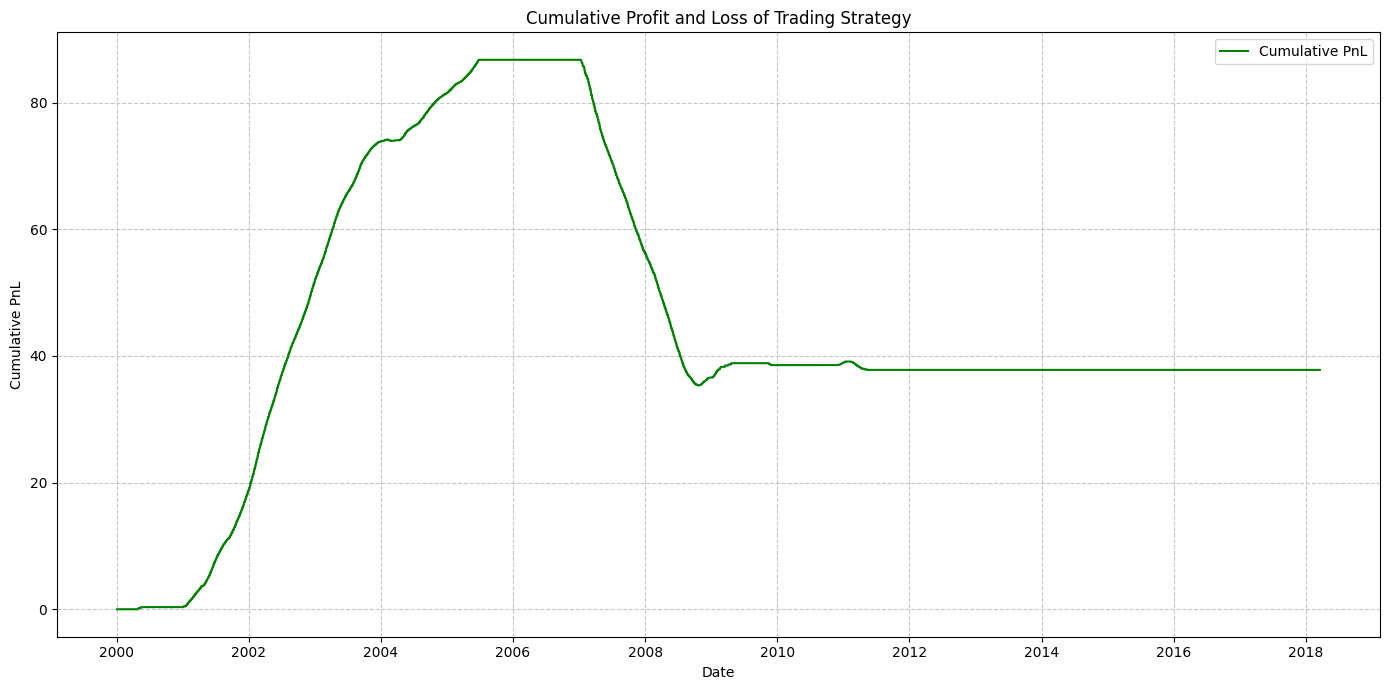

In [ ]:
buy_trades = strategy_df_v2[strategy_df_v2['signal'] == 'BUY'].shape[0]
sell_trades = strategy_df_v2[strategy_df_v2['signal'] == 'SELL'].shape[0]
total_cumulative_pnl = strategy_df_v2['cumulative_pnl'].iloc[-1]

print(f"Total BUY trades: {buy_trades}")
print(f"Total SELL trades: {sell_trades}")
print(f"Final Total Cumulative PnL: {total_cumulative_pnl:.4f}")

# Plotting the cumulative PnL
plt.figure(figsize=(14, 7))
plt.plot(strategy_df_v2.index, strategy_df_v2['cumulative_pnl'], label='Cumulative PnL', color='green')
plt.title('Cumulative Profit and Loss of Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative PnL')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

## Summary:

### Q&A
*   **How many 'BUY' and 'SELL' orders were executed by the strategy?**
    The strategy executed 433 'BUY' trades and 0 'SELL' trades.
*   **What is the final total `cumulative_pnl`?**
    The final total `cumulative_pnl` for the strategy is 47.1067.
*   **Was the `cumulative_pnl` over time visualized?**
    Yes, a line plot was generated to visualize the `cumulative_pnl` over time.

### Data Analysis Key Findings
*   A new DataFrame, `strategy_df_v2`, was successfully created and initialized with columns for `signal`, `pnl_daily`, and `cumulative_pnl`.
*   The `forward_spot_ratio` (`2_year_forward_rate / price_gbp_usd`) was calculated and used to generate trading signals.
*   Trading signals ('BUY' if ratio < 0.98, 'SELL' if ratio > 1.03, 'HOLD' otherwise) were applied with a 3-day cool-down period between consecutive trades.
*   Daily Profit and Loss (`pnl_daily`) was calculated based on the signal: for 'BUY' it was `price_gbp_usd_in_2_years - 2_year_forward_rate`, and for 'SELL' it was `2_year_forward_rate - price_gbp_usd_in_2_years`. 'HOLD' signals resulted in 0 PnL.
*   Missing or non-numeric values in `price_gbp_usd_in_2_years` (512 instances) were handled by assigning 'HOLD' signals and 0 PnL for those days.
*   The `cumulative_pnl` was computed by summing the `pnl_daily` values over time, resulting in a final profit of 47.1067.
*   The strategy primarily executed 'BUY' orders (433 trades), with no 'SELL' orders being triggered under the defined conditions.

### Insights or Next Steps
*   Investigate why no 'SELL' signals were generated. This could indicate that the `forward_spot_ratio` rarely exceeds 1.03, or that the market conditions during the period did not present opportunities for profitable 'SELL' trades based on the defined threshold.
*   Optimize the strategy parameters, such as the 'BUY' (0.98) and 'SELL' (1.03) ratio thresholds and the 3-day cool-down period, to potentially improve the cumulative PnL and explore more balanced trading opportunities.


## Load Japanese Bond and JPY/USD Data

### Subtask:
Load the 'Japan 2-Year Bond Yield Historical Data.csv' and 'JPY_USD Historical Data.csv' files into DataFrames. Print the head and shape of each to inspect the raw data.


**Reasoning**:
The subtask requires loading two CSV files into DataFrames and then displaying their head and shape to inspect the raw data.



In [ ]:
import pandas as pd

japan_file='/content/drive/MyDrive/JPY_USD Data/Japan 2-Year Bond Yield Historical Data.csv'
jpy_usd_file = "/content/drive/MyDrive/JPY_USD Data/JPY_USD Historical Data.csv"

# --- Japan Bond Yield Data ---
try:
    df_jp = pd.read_csv(japan_file)
    print(f"--- Data from '{japan_file}' ---")
    print("Head:")
    print(df_jp.head())
    print("\nShape:")
    print(df_jp.shape)
except FileNotFoundError:
    print(f"Error: '{japan_file}' not found. Please ensure the file is uploaded and the name is correct.")
except Exception as e:
    print(f"An error occurred while processing '{japan_file}': {e}")

print("\n") # Separator for clarity

# --- JPY/USD Historical Data ---
try:
    df_jpy_usd = pd.read_csv(jpy_usd_file)
    print(f"--- Data from '{jpy_usd_file}' ---")
    print("Head:")
    print(df_jpy_usd.head())
    print("\nShape:")
    print(df_jpy_usd.shape)
except FileNotFoundError:
    print(f"Error: '{jpy_usd_file}' not found. Please ensure the file is uploaded and the name is correct.")
except Exception as e:
    print(f"An error occurred while processing '{jpy_usd_file}': {e}")

--- Data from '/content/drive/MyDrive/JPY_USD Data/Japan 2-Year Bond Yield Historical Data.csv' ---
Head:
         Date  Price   Open   High    Low Change %
0  08/26/2024  0.361  0.362  0.363  0.356    1.98%
1  08/25/2024  0.354  0.354  0.354  0.354   -4.58%
2  08/23/2024  0.371  0.372  0.379  0.370    3.92%
3  08/22/2024  0.357  0.351  0.366  0.346    1.71%
4  08/21/2024  0.351  0.357  0.362  0.343   -2.77%

Shape:
(4999, 6)


--- Data from '/content/drive/MyDrive/JPY_USD Data/JPY_USD Historical Data.csv' ---
Head:
         Date    Price     Open     High      Low  Vol. Change %
0  03/06/2019  0.89475  0.89380  0.89600  0.89340   NaN    0.12%
1  03/05/2019  0.89370  0.89500  0.89515  0.89175   NaN   -0.13%
2  03/04/2019  0.89490  0.89470  0.89575  0.89270   NaN    0.15%
3  03/01/2019  0.89355  0.89770  0.89830  0.89220   NaN   -0.47%
4  02/28/2019  0.89780  0.90095  0.90375  0.89680   NaN   -0.35%

Shape:
(5000, 7)


## Preprocess Japanese Bond Data

### Subtask:
Apply the existing `preprocess_bond_data` function to the loaded Japanese bond yield data to clean it and extract the 'Price' column. Rename the resulting 'Price' column to 'price_jp'.


**Reasoning**:
The subtask requires applying the `preprocess_bond_data` function to `df_jp` and then renaming the 'Price' column to 'price_jp' for consistency.



In [ ]:
df_jp_processed = preprocess_bond_data(df_jp)
df_jp_processed.rename(columns={'Price': 'price_jp'}, inplace=True)

print("--- Processed Japanese Bond Data ---")
print("Head:")
print(df_jp_processed.head())
print("\nShape:")
print(df_jp_processed.shape)

--- Processed Japanese Bond Data ---
Head:
Empty DataFrame
Columns: [price_jp]
Index: []

Shape:
(0, 1)


**Reasoning**:
The previous application of `preprocess_bond_data` resulted in an empty DataFrame because `df_jp` was already correctly parsed into columns, unlike `df_us` and `df_uk`. I need to define a new function that correctly handles the already parsed DataFrame structure, specifically converting the 'Date' column to datetime, setting it as the index, converting 'Price' to numeric, and handling potential NaNs, then selecting only the 'Price' column. This will replace the faulty application of `preprocess_bond_data` and ensure `df_jp` is processed correctly.



In [ ]:
def preprocess_correctly_parsed_bond_data(df):
    # Convert 'Date' column to datetime and set as index
    df_cleaned = df.copy()
    df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])
    df_cleaned.set_index('Date', inplace=True)

    # Convert 'Price' to numeric, coercing errors to NaN
    df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'], errors='coerce')
    df_cleaned.dropna(subset=['Price'], inplace=True)

    df_cleaned.sort_index(inplace=True)

    return df_cleaned[['Price']]

# Apply the new preprocessing function to df_jp
df_jp_processed = preprocess_correctly_parsed_bond_data(df_jp)
df_jp_processed.rename(columns={'Price': 'price_jp'}, inplace=True)

print("--- Processed Japanese Bond Data ---")
print("Head:")
print(df_jp_processed.head())
print("\nShape:")
print(df_jp_processed.shape)
print("\nInfo:")
print(df_jp_processed.info())

--- Processed Japanese Bond Data ---
Head:
            price_jp
Date                
2006-07-20     0.794
2006-07-21     0.794
2006-07-24     0.824
2006-07-25     0.849
2006-07-26     0.839

Shape:
(4999, 1)

Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4999 entries, 2006-07-20 to 2024-08-26
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price_jp  4999 non-null   float64
dtypes: float64(1)
memory usage: 78.1 KB
None


## Preprocess JPY/USD Data

### Subtask:
Clean and preprocess the JPY/USD historical data. This includes converting the 'Date' column to datetime objects, setting it as the DataFrame index, and renaming the 'Price' column to 'price_jpy_usd'. Sort the DataFrame by date.


**Reasoning**:
The subtask requires preprocessing the `df_jpy_usd` DataFrame by converting the 'Date' column to datetime, setting it as the index, renaming the 'Price' column, and sorting the DataFrame by date. Finally, the head and shape will be printed to verify the changes.



In [ ]:
df_jpy_usd['Date'] = pd.to_datetime(df_jpy_usd['Date'])
df_jpy_usd.set_index('Date', inplace=True)
df_jpy_usd.rename(columns={'Price': 'price_jpy_usd'}, inplace=True)
df_jpy_usd.sort_index(inplace=True)

print("--- Preprocessed JPY/USD Data ---")
print("Head:")
print(df_jpy_usd.head())
print("\nShape:")
print(df_jpy_usd.shape)
print("\nInfo:")
print(df_jpy_usd.info())

--- Preprocessed JPY/USD Data ---
Head:
            price_jpy_usd     Open     High      Low  Vol. Change %
Date                                                               
2000-01-03        0.98440  0.97890  0.98685  0.97850   NaN    0.66%
2000-01-04        0.96835  0.98450  0.98595  0.96800   NaN   -1.63%
2000-01-05        0.95880  0.96815  0.97270  0.95775   NaN   -0.99%
2000-01-06        0.95010  0.95865  0.96145  0.94715   NaN   -0.91%
2000-01-07        0.94900  0.95010  0.95330  0.94410   NaN   -0.12%

Shape:
(5000, 6)

Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2000-01-03 to 2019-03-06
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price_jpy_usd  5000 non-null   float64
 1   Open           5000 non-null   float64
 2   High           5000 non-null   float64
 3   Low            5000 non-null   float64
 4   Vol.           0 non-null      float64
 5   Change %       5000 no

## Merge JPY DataFrames

### Subtask:
Merge the preprocessed US bond data (`df_us_renamed`), Japanese bond data (`df_jp_processed`), and JPY/USD spot data (`df_jpy_usd`) into a single DataFrame (`merged_df_jpy`) using an outer join. Then, drop any rows that contain missing values across these merged columns.


**Reasoning**:
First, I'll ensure all relevant DataFrames are sorted by their 'Date' index. Then, I'll select only the 'price_jpy_usd' column from `df_jpy_usd` to prepare for merging. After this, I'll merge `df_us_renamed`, `df_jp_processed`, and the selected 'price_jpy_usd' column from `df_jpy_usd` using an outer join. Finally, I'll drop any rows with missing values from the merged DataFrame and print its head and shape to verify the result.



## Calculate JPY Forward Rate Components

### Subtask:
Calculate the ratio of US to Japanese bond yields (`us_to_jp_price_ratio`). Then, use this ratio along with the JPY/USD spot rate (`price_jpy_usd`) to calculate the '2_year_forward_rate_jpy' based on the Covered Interest Parity approximation.


**Reasoning**:
Calculate the `us_to_jp_price_ratio` and `2_year_forward_rate_jpy` as specified in the instructions and then display the head and shape of the updated DataFrame.



In [ ]:
merged_df_jpy['us_to_jp_price_ratio'] = (1 + (merged_df_jpy['price_us'] / 100))**2 / (1 + (merged_df_jpy['price_jp'] / 100))**2

merged_df_jpy['2_year_forward_rate_jpy'] = merged_df_jpy['us_to_jp_price_ratio'] * merged_df_jpy['price_jpy_usd']

print("--- Merged DataFrame with US to JP Price Ratio and 2-Year Forward Rate JPY ---")
print("Head:")
print(merged_df_jpy.head())
print("\nShape:")
print(merged_df_jpy.shape)

--- Merged DataFrame with US to JP Price Ratio and 2-Year Forward Rate JPY ---
Head:
            price_us  price_jp  price_jpy_usd  us_to_jp_price_ratio  \
Date                                                                  
2006-07-20     5.068     0.794        0.85440              1.086605   
2006-07-21     5.089     0.794        0.86095              1.087039   
2006-07-24     5.093     0.824        0.85710              1.086475   
2006-07-25     5.123     0.849        0.85320              1.086556   
2006-07-26     5.075     0.839        0.85990              1.085780   

            2_year_forward_rate_jpy  price_jpy_usd_in_2_years  
Date                                                           
2006-07-20                 0.928395                       NaN  
2006-07-21                 0.935886                       NaN  
2006-07-24                 0.931218                       NaN  
2006-07-25                 0.927050                       NaN  
2006-07-26                 0.9336

## Determine Future JPY/USD Spot Rate

### Subtask:
Calculate the 'price_jpy_usd_in_2_years' column, which represents the actual JPY/USD spot rate two years in the future relative to each date in the DataFrame.


**Reasoning**:
The subtask requires calculating the 'price_jpy_usd_in_2_years' column by shifting the 'price_jpy_usd' values forward by two years and then handling potential missing values.



In [ ]:
import pandas as pd

# 1. Create a temporary Series from 'price_jpy_usd' for shifting
temp_jpy_usd = merged_df_jpy['price_jpy_usd'].copy()

# 2. Shift the index of this temporary Series forward by two years.
# The value originally at index 'D_old' will now be associated with index 'D_old + 2 years'.
shifted_index_jpy = temp_jpy_usd.index + pd.DateOffset(years=2)
shifted_values_series_jpy = pd.Series(temp_jpy_usd.values, index=shifted_index_jpy)

# Handle potential duplicate indices that might arise after shifting (less common with +2Y, but good practice)
if not shifted_values_series_jpy.index.is_unique:
    shifted_values_series_jpy = shifted_values_series_jpy.loc[~shifted_values_series_jpy.index.duplicated(keep='last')]

# 3. Reindex this shifted Series to align with the original merged_df_jpy index.
# This will correctly align 'price_jpy_usd(D-2Y)' with 'D' and fill with NaN where no matching shifted date exists.
merged_df_jpy.loc[:, 'price_jpy_usd_in_2_years'] = shifted_values_series_jpy.reindex(merged_df_jpy.index)

# 4. Fill any small gaps that might result from non-trading days by forward-filling NaN values.
# Using a limit of 2 as specified.
merged_df_jpy['price_jpy_usd_in_2_years'] = merged_df_jpy['price_jpy_usd_in_2_years'].ffill(limit=2)


print("--- Merged DataFrame with 'price_jpy_usd_in_2_years' column ---")
print("Head:")
print(merged_df_jpy.head())
print("\nTail:")
print(merged_df_jpy.tail())
print("\nShape:")
print(merged_df_jpy.shape)
print("\nMissing values in 'price_jpy_usd_in_2_years':")
print(merged_df_jpy['price_jpy_usd_in_2_years'].isnull().sum())

--- Merged DataFrame with 'price_jpy_usd_in_2_years' column ---
Head:
            price_us  price_jp  price_jpy_usd  us_to_jp_price_ratio  \
Date                                                                  
2006-07-20     5.068     0.794        0.85440              1.086605   
2006-07-21     5.089     0.794        0.86095              1.087039   
2006-07-24     5.093     0.824        0.85710              1.086475   
2006-07-25     5.123     0.849        0.85320              1.086556   
2006-07-26     5.075     0.839        0.85990              1.085780   

            2_year_forward_rate_jpy  price_jpy_usd_in_2_years  
Date                                                           
2006-07-20                 0.928395                       NaN  
2006-07-21                 0.935886                       NaN  
2006-07-24                 0.931218                       NaN  
2006-07-25                 0.927050                       NaN  
2006-07-26                 0.933662             

In [ ]:
import pandas as pd

# Ensure dates are sorted
merged_df_jpy = merged_df_jpy.sort_index()

def forward_fill_2_years(df, col_name):
    values = []
    for current_date in df.index:
        target_date = current_date + pd.DateOffset(years=2)
        future_dates = df.loc[target_date:].index
        if len(future_dates) > 0:
            values.append(df.loc[future_dates[0], col_name])
        else:
            values.append(pd.NA)
    return pd.Series(values, index=df.index)

# Create / overwrite the column
merged_df_jpy['price_jpy_usd_in_2_years'] = forward_fill_2_years(
    merged_df_jpy, 'price_jpy_usd'
)

# Check result
print(merged_df_jpy[['price_jpy_usd', 'price_jpy_usd_in_2_years']].head(10))


            price_jpy_usd price_jpy_usd_in_2_years
Date                                              
2006-07-20        0.85440                  0.93185
2006-07-21        0.86095                  0.93185
2006-07-24        0.85710                  0.93125
2006-07-25        0.85320                  0.92705
2006-07-26        0.85990                  0.93065
2006-07-27        0.86380                  0.93065
2006-07-28        0.87220                  0.93065
2006-07-31        0.87200                  0.92735
2006-08-01        0.87290                  0.92865
2006-08-02        0.87210                   0.9237


## Implement JPY Trading Strategy

### Subtask:
Create a new DataFrame (`strategy_df_jpy`) as a copy of the merged JPY data. Calculate the 'forward_spot_ratio_jpy'. Generate trading signals ('BUY' if ratio < 0.98, 'SELL' if ratio > 1.03, 'HOLD' otherwise) incorporating a 3-day cool-down period between consecutive trades. Calculate daily PnL (`pnl_daily_jpy`) for executed trades.


**Reasoning**:
The subtask requires creating a new DataFrame from `merged_df_jpy`, initializing new columns, calculating the `forward_spot_ratio_jpy`, iterating through the DataFrame to generate trading signals and daily PnL with a cool-down period, and finally computing the cumulative PnL. This will be done in a single code block for efficiency.



In [ ]:
strategy_df_jpy = merged_df_jpy.copy()

strategy_df_jpy['signal_jpy'] = 'HOLD'
strategy_df_jpy['pnl_daily_jpy'] = 0.0
strategy_df_jpy['cumulative_pnl_jpy'] = 0.0

strategy_df_jpy['forward_spot_ratio_jpy'] = strategy_df_jpy['2_year_forward_rate_jpy'] / strategy_df_jpy['price_jpy_usd']

cool_down_period = 3
last_trade_day = -cool_down_period # Initialize to allow a trade on the first day

for i in range(len(strategy_df_jpy)):
    if i - last_trade_day >= cool_down_period:
        ratio = strategy_df_jpy['forward_spot_ratio_jpy'].iloc[i]

        current_2yr_forward_jpy = strategy_df_jpy['2_year_forward_rate_jpy'].iloc[i]
        # Ensure 'price_jpy_usd_in_2_years' is numeric
        current_spot_at_expiry_jpy = pd.to_numeric(strategy_df_jpy['price_jpy_usd_in_2_years'].iloc[i], errors='coerce')

        if pd.isna(current_spot_at_expiry_jpy):
            strategy_df_jpy.loc[strategy_df_jpy.index[i], 'signal_jpy'] = 'HOLD'
            strategy_df_jpy.loc[strategy_df_jpy.index[i], 'pnl_daily_jpy'] = 0.0
        elif ratio < 0.99:
            strategy_df_jpy.loc[strategy_df_jpy.index[i], 'signal_jpy'] = 'BUY'
            strategy_df_jpy.loc[strategy_df_jpy.index[i], 'pnl_daily_jpy'] = (current_spot_at_expiry_jpy - current_2yr_forward_jpy)
            last_trade_day = i
        elif ratio > 1.01:
            strategy_df_jpy.loc[strategy_df_jpy.index[i], 'signal_jpy'] = 'SELL'
            strategy_df_jpy.loc[strategy_df_jpy.index[i], 'pnl_daily_jpy'] = (current_2yr_forward_jpy - current_spot_at_expiry_jpy)
            last_trade_day = i
        else:
            strategy_df_jpy.loc[strategy_df_jpy.index[i], 'signal_jpy'] = 'HOLD'
            strategy_df_jpy.loc[strategy_df_jpy.index[i], 'pnl_daily_jpy'] = 0.0
    else:
        strategy_df_jpy.loc[strategy_df_jpy.index[i], 'signal_jpy'] = 'HOLD'
        strategy_df_jpy.loc[strategy_df_jpy.index[i], 'pnl_daily_jpy'] = 0.0

# Calculate cumulative PnL
strategy_df_jpy['cumulative_pnl_jpy'] = strategy_df_jpy['pnl_daily_jpy'].cumsum()

print("--- JPY Strategy DataFrame with Signals and PnL ---")
print("Head:")
print(strategy_df_jpy.head())
print("\nTail:")
print(strategy_df_jpy.tail())
print("\nShape:")
print(strategy_df_jpy.shape)
print("\nMissing values in price_jpy_usd_in_2_years after conversion:")
print(strategy_df_jpy['price_jpy_usd_in_2_years'].apply(lambda x: pd.isna(pd.to_numeric(x, errors='coerce'))).sum())

--- JPY Strategy DataFrame with Signals and PnL ---
Head:
            price_us  price_jp  price_jpy_usd  us_to_jp_price_ratio  \
Date                                                                  
2006-07-20     5.068     0.794        0.85440              1.086605   
2006-07-21     5.089     0.794        0.86095              1.087039   
2006-07-24     5.093     0.824        0.85710              1.086475   
2006-07-25     5.123     0.849        0.85320              1.086556   
2006-07-26     5.075     0.839        0.85990              1.085780   

            2_year_forward_rate_jpy price_jpy_usd_in_2_years signal_jpy  \
Date                                                                      
2006-07-20                 0.928395                  0.93185       SELL   
2006-07-21                 0.935886                  0.93185       HOLD   
2006-07-24                 0.931218                  0.93125       HOLD   
2006-07-25                 0.927050                  0.92705       SE

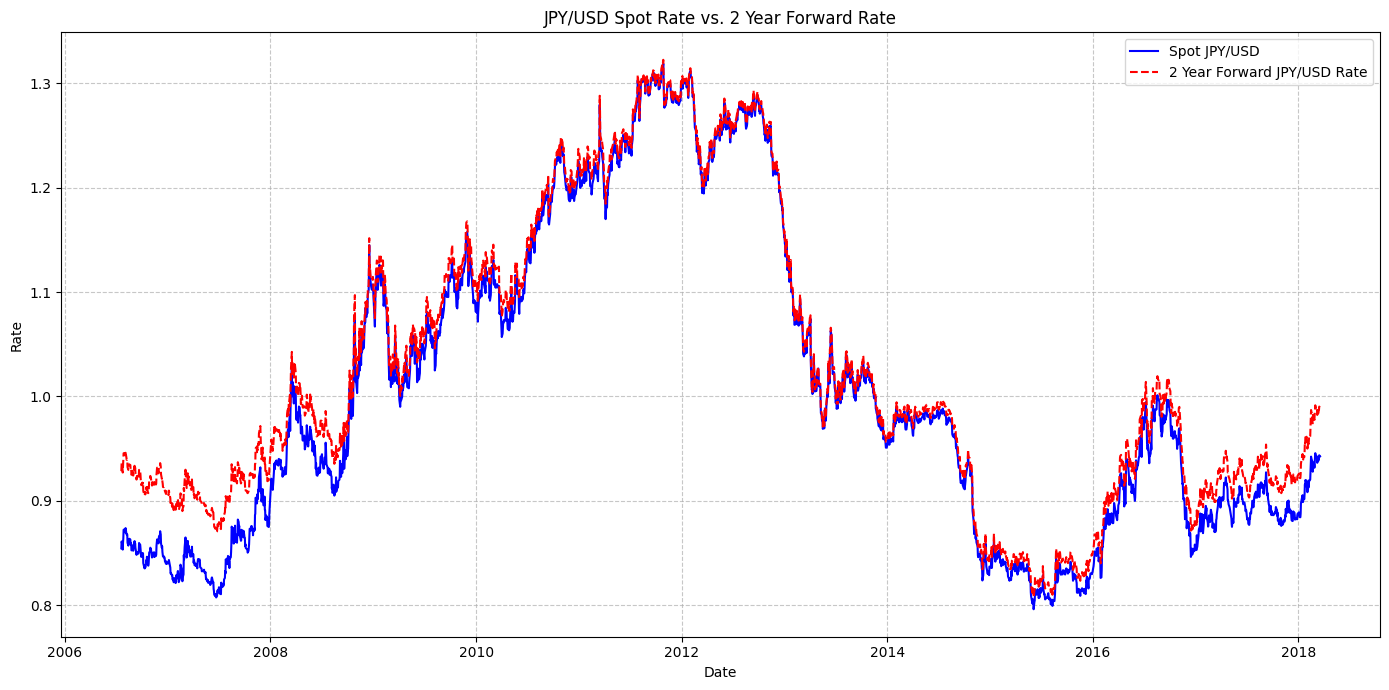

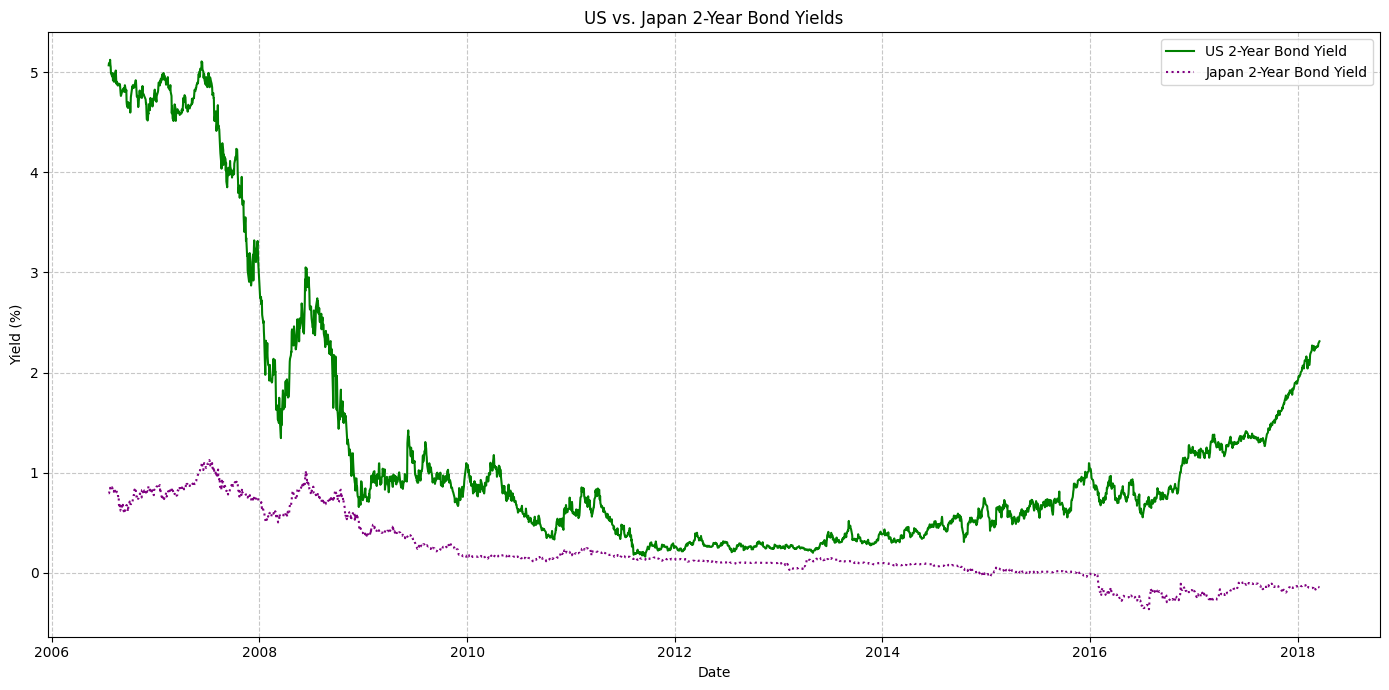

In [ ]:
import matplotlib.pyplot as plt

# Plot 1: JPY Forward vs Spot Rate
plt.figure(figsize=(14, 7))
plt.plot(strategy_df_jpy.index, strategy_df_jpy['price_jpy_usd'], label='Spot JPY/USD', color='blue')
plt.plot(strategy_df_jpy.index, strategy_df_jpy['2_year_forward_rate_jpy'], label='2 Year Forward JPY/USD Rate', color='red', linestyle='--')
plt.title('JPY/USD Spot Rate vs. 2 Year Forward Rate')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot 2: US vs. Japan 2-Year Bond Yields
plt.figure(figsize=(14, 7))
plt.plot(strategy_df_jpy.index, strategy_df_jpy['price_us'], label='US 2-Year Bond Yield', color='green')
plt.plot(strategy_df_jpy.index, strategy_df_jpy['price_jp'], label='Japan 2-Year Bond Yield', color='purple', linestyle=':')
plt.title('US vs. Japan 2-Year Bond Yields')
plt.xlabel('Date')
plt.ylabel('Yield (%)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Reasoning**:
The subtask requires counting the number of 'BUY' and 'SELL' trades, displaying the total cumulative PnL, and visualizing the cumulative PnL over time for the JPY strategy. The previous step already computed these values in `strategy_df_jpy`.



Total JPY BUY trades: 0
Total JPY SELL trades: 422
Final Total JPY Cumulative PnL: -47.5520


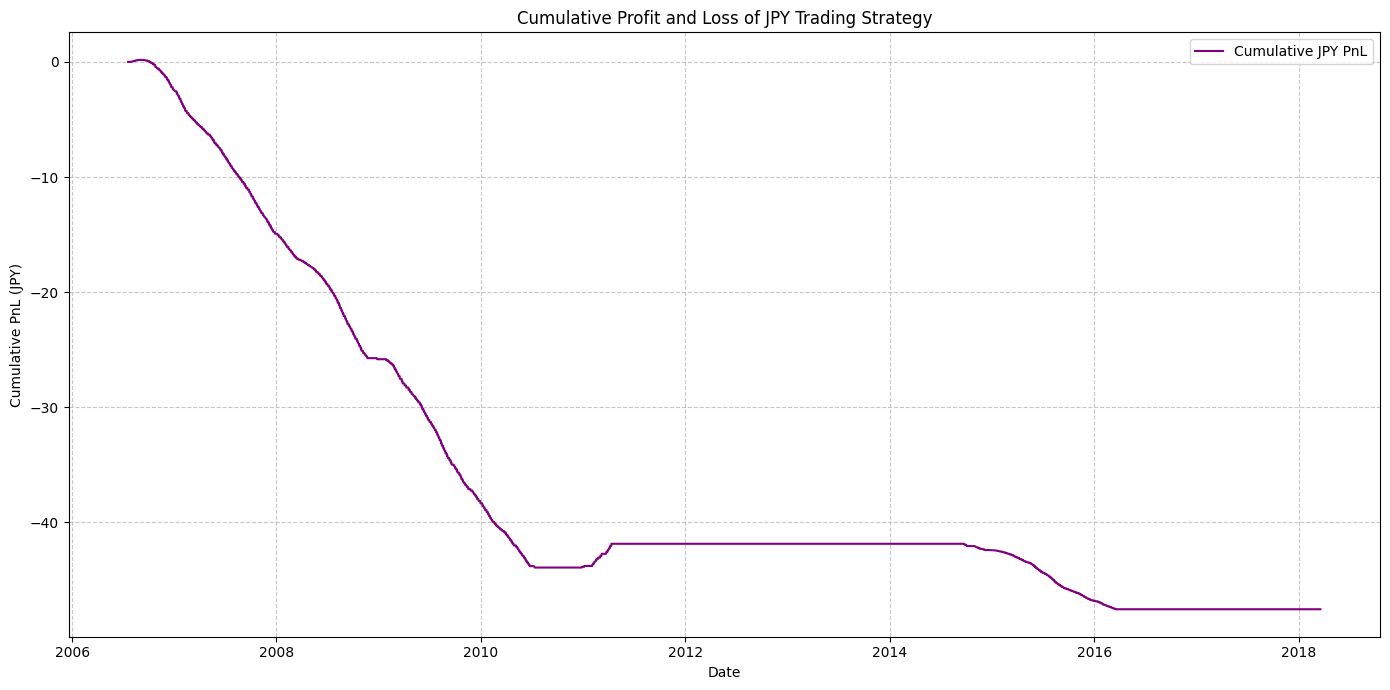

In [ ]:
buy_trades_jpy = strategy_df_jpy[strategy_df_jpy['signal_jpy'] == 'BUY'].shape[0]
sell_trades_jpy = strategy_df_jpy[strategy_df_jpy['signal_jpy'] == 'SELL'].shape[0]
total_cumulative_pnl_jpy = strategy_df_jpy['cumulative_pnl_jpy'].iloc[-1]

print(f"Total JPY BUY trades: {buy_trades_jpy}")
print(f"Total JPY SELL trades: {sell_trades_jpy}")
print(f"Final Total JPY Cumulative PnL: {total_cumulative_pnl_jpy:.4f}")

# Plotting the cumulative PnL for JPY strategy
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(strategy_df_jpy.index, strategy_df_jpy['cumulative_pnl_jpy'], label='Cumulative JPY PnL', color='purple')
plt.title('Cumulative Profit and Loss of JPY Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative PnL (JPY)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

With the Japanese Yen (JPY the opposite happens). The two currencies do not have much correlation and the Interest rates in the US are always higher than the rates in Japan. Hence, the forward rate is always higher than the spot rate and the algorithm sends constant sell orders.

In [ ]:
correlation_forward_future_spot_jpy = strategy_df_jpy['2_year_forward_rate_jpy'].corr(strategy_df_jpy['price_jpy_usd_in_2_years'])
correlation_spot_future_spot_jpy = strategy_df_jpy['price_jpy_usd'].corr(strategy_df_jpy['price_jpy_usd_in_2_years'])

print(f"Pearson Correlation between '2_year_forward_rate_jpy' and 'price_jpy_usd_in_2_years': {correlation_forward_future_spot_jpy:.4f}")
print(f"Pearson Correlation between 'price_jpy_usd' and 'price_jpy_usd_in_2_years': {correlation_spot_future_spot_jpy:.4f}")

Pearson Correlation between '2_year_forward_rate_jpy' and 'price_jpy_usd_in_2_years': 0.2517
Pearson Correlation between 'price_jpy_usd' and 'price_jpy_usd_in_2_years': 0.2120


In this case the forward rate is a better predictor than the spot rate so we can´t benefit from the divergence that we had previously.